<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #0c994de7, #1a975586);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Credit Card Fraud Detection using Logistic Regression
    </h1>
</div>



<h4 style="color:#00ff77ff">1. Importing essential Python libraries: <code>pandas</code> and <code>numpy</code> for data manipulation and numerical computing, <code>matplotlib.pyplot</code> and <code>seaborn</code> for visualization design, and key <code>scikit-learn</code> modules for dataset splitting, feature scaling (<code>StandardScaler</code>), model construction (<code>LogisticRegression</code>), and performance evaluation using metrics such as <code>classification_report</code>, <code>confusion_matrix</code>, and <code>accuracy_score</code></h4>


In [693]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',35)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<h4 style="color:#00ff77ff">2. Loading the credit card transactions dataset into a <code style="color:#ffd166; font-weight:600;">pandas</code> DataFrame named <code style="color:#ffd166; font-weight:600;">credit_data</code> using <code style="color:#ffd166; font-weight:600;">pd.read_csv()</code> from the specified local path, establishing the core dataset for fraud detection analysis and model training</h4>

In [694]:
credit_data=pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\Projects\Credit Card Fraud Detection\Data\creditcard.csv")

<h4 style="color:#00ff77ff">3. Displaying the first and last records of the dataset using <code style="color:#ffd166; font-weight:600;">credit_data.head(10)</code> and <code style="color:#ffd166; font-weight:600;">credit_data.tail(10)</code> to preview the top 10 and bottom 10 rows -> providing an initial overview of data structure, column types, and potential anomalies before in-depth analysis</h4>

In [695]:
credit_data.head(10)
credit_data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<h4 style="color:#00ff77ff">4. Generating a statistical summary of numerical features using <code style="color:#ffd166; font-weight:600;">credit_data.describe()</code> to review key descriptive statistics such as count, mean, standard deviation, minimum, quartiles, and maximum —> helping identify data distribution patterns, potential outliers, and scaling differences among features</h4>

In [696]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h4 style="color:#00ff77ff">5. Displaying dataset structure and metadata using <code style="color:#ffd166; font-weight:600;">credit_data.info()</code> to examine column names, data types, non-null counts, and overall memory usage —> providing insights into missing values, feature formats, and the dataset’s readiness for preprocessing</h4>

In [697]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h4 style="color:#00ff77ff">6. Retrieving dataset dimensions using <code style="color:#ffd166; font-weight:600;">credit_data.shape</code> and displaying them with formatted print statements  <code style="color:#ffd166; font-weight:600;">print(f"Shape of the dataset: {credit_data.shape}")</code>, <code style="color:#ffd166; font-weight:600;">print(f"Number of rows: {credit_data.shape[0]}")</code>, and <code style="color:#ffd166; font-weight:600;">print(f"Number of columns: {credit_data.shape[1]}")</code> —> to confirm the total number of observations and features before proceeding with data preprocessing</h4>

In [ ]:
print(f"Shape of the dataset: {credit_data.shape}")
print(f"Number of rows: {credit_data.shape[0]}")
print(f"Number of columns: {credit_data.shape[1]}")

Shape of the dataset: (284807, 31)
Number of rows: 284807
Number of columns: 31


<h4 style="color:#00ff77ff">7. Checking for missing data using <code style="color:#ffd166; font-weight:600;">credit_data.isna().sum().sum()</code> to get the total count of missing values across the entire dataset, and <code style="color:#ffd166; font-weight:600;">credit_data.isna().sum()</code> to display the number of missing values per column —> ensuring data completeness and identifying features that may require cleaning or imputation</h4>

In [699]:
print(f"Number of missing values: {credit_data.isna().sum().sum()}")
print(f"Number of missing values per column:\n{credit_data.isna().sum()}")

Number of missing values: 0
Number of missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<h4 style="color:#00ff77ff">8. Detecting and removing duplicate records using <code style="color:#ffd166; font-weight:600;">credit_data.duplicated().sum()</code> to count duplicated rows, followed by <code style="color:#ffd166; font-weight:600;">credit_data.drop_duplicates(inplace=True)</code> to eliminate them from the dataset, and rechecking duplicates to confirm data integrity —> ensuring each transaction record is unique and preventing bias in the fraud detection model</h4>


In [700]:
print(f"Number of duplicate rows: {credit_data.duplicated().sum()}")
credit_data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removing duplicates: {credit_data.duplicated().sum()}")

Number of duplicate rows: 1081
Number of duplicate rows after removing duplicates: 0


<h4 style="color:#00ff77ff">9. Exploring dataset variability using <code style="color:#ffd166; font-weight:600;">credit_data.nunique()</code> to print the number of unique values in each column —> helping identify categorical features, detect potential constant or low-variance columns, and gain insights into feature diversity for further preprocessing and modeling</h4>


In [701]:
print(f"Number of unique values per column:\n{credit_data.nunique()}")

Number of unique values per column:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


<h4 style="color:#00ff77ff">10. Visualizing the distribution of transaction times using <code style="color:#ffd166; font-weight:600;">sns.boxenplot()</code> on the <code style="color:#ffd166; font-weight:600;">Time</code> column with a horizontal orientation (<code style="color:#ffd166; font-weight:600;">orient='h'</code>) and color palette <code style="color:#ffd166; font-weight:600;">'Set3'</code> —>
 providing a detailed view of data spread, central tendency, and potential outliers in transaction timing</h4>


C:\Users\Rammah\AppData\Local\Temp\ipykernel_14252\924135708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=credit_data['Time'],orient='h',palette='Set3')


<Axes: xlabel='Time'>

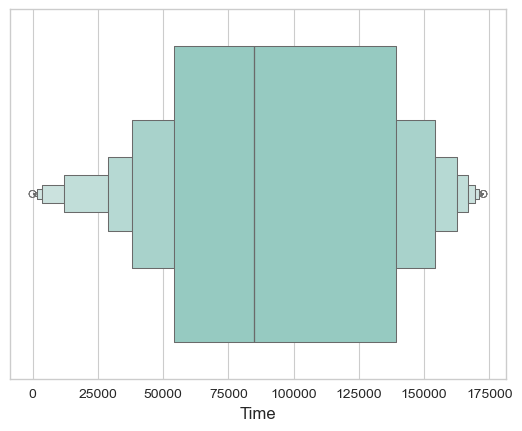

In [702]:
sns.boxenplot(data=credit_data['Time'],orient='h',palette='Set3')

<h4 style="color:#00ff77ff">11. Visualizing the distribution of transaction amounts using <code style="color:#ffd166; font-weight:600;">sns.boxenplot()</code> on the <code style="color:#ffd166; font-weight:600;">Amount</code> column with a horizontal layout (<code style="color:#ffd166; font-weight:600;">orient='h'</code>) and the <code style="color:#ffd166; font-weight:600;">'Set3'</code> color palette —> illustrating the range, skewness, and presence of outliers in transaction values, which helps in understanding spending behavior and detecting anomalies</h4>


C:\Users\Rammah\AppData\Local\Temp\ipykernel_14252\4292329021.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=credit_data['Amount'],orient='h',palette='Set3')


<Axes: xlabel='Amount'>

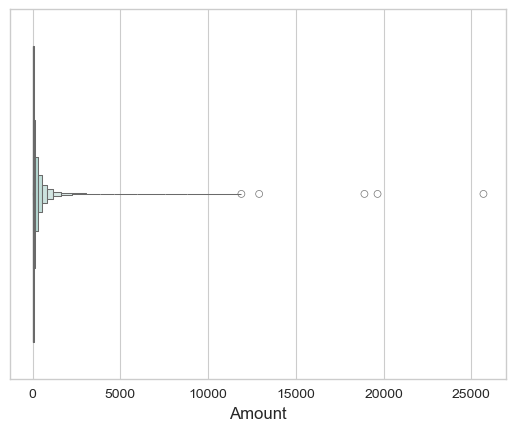

In [703]:
sns.boxenplot(data=credit_data['Amount'],orient='h',palette='Set3')

<h4 style="color:#00ff77ff">12. Detecting and removing outliers in the <code style="color:#ffd166; font-weight:600;">Time</code> feature using the Interquartile Range (IQR) method —> calculating the first quartile (<code style="color:#ffd166; font-weight:600;">Q1</code>), third quartile (<code style="color:#ffd166; font-weight:600;">Q3</code>), and the IQR (<code style="color:#ffd166; font-weight:600;">IQR = Q3 - Q1</code>), then defining the acceptable range between <code style="color:#ffd166; font-weight:600;">lower_bound = Q1 - 1.5 * IQR</code> and <code style="color:#ffd166; font-weight:600;">upper_bound = Q3 + 1.5 * IQR</code>. Records outside this range are filtered out to remove extreme values —> improving data quality and ensuring that model training focuses on representative transaction times.</h4>


In [704]:
Q1=credit_data['Time'].quantile(0.25)
Q3=credit_data['Time'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Shape of the dataset before removing outliers: {credit_data.shape}")
print(f"Lower bound: {lower_bound} Upper bound: {upper_bound}")
credit_data=credit_data[(credit_data['Time']>=lower_bound) & (credit_data['Time']<=upper_bound)]
print(f"Shape of the dataset after removing outliers: {credit_data.shape}")

Shape of the dataset before removing outliers: (283726, 31)
Lower bound: -73435.125 Upper bound: 266937.875
Shape of the dataset after removing outliers: (283726, 31)


<h4 style="color:#00ff77ff">13. Checking the distribution of target classes using <code style="color:#ffd166; font-weight:600;">credit_data['Class'].value_counts()</code> to count the occurrences of each class label —> typically revealing class imbalance between legitimate (<code style="color:#ffd166; font-weight:600;">0</code>) and fraudulent (<code style="color:#ffd166; font-weight:600;">1</code>) transactions, which is crucial for understanding dataset bias and planning appropriate resampling or weighting strategies during model training</h4>


In [705]:
credit_data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<h4 style="color:#00ff77ff">14. Calculating the mean of each feature grouped by transaction class using <code style="color:#ffd166; font-weight:600;">credit_data.groupby('Class').mean()</code> —> this summarizes the average values of all numerical features for both legitimate (<code style="color:#ffd166; font-weight:600;">Class = 0</code>) and fraudulent (<code style="color:#ffd166; font-weight:600;">Class = 1</code>) transactions, helping identify distinguishing patterns, behavioral differences, and key variables that may influence fraud detection modeling</h4>


In [706]:
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


<h4 style="color:#00ff77ff">15. Visualizing the class distribution with a pie chart using <code style="color:#ffd166; font-weight:600;">plt.pie()</code> —> displaying the proportions of <code style="color:#ffd166; font-weight:600;">Legitimate</code> and <code style="color:#ffd166; font-weight:600;">Fraud</code> transactions based on <code style="color:#ffd166; font-weight:600;">credit_data['Class'].value_counts()</code>. The chart includes percentage labels (<code style="color:#ffd166; font-weight:600;">autopct='%1.2f%%'</code>), custom colors (<code style="color:#ffd166; font-weight:600;">["#5a1d35","#f41b03"]</code>), a slight explosion for emphasis (<code style="color:#ffd166; font-weight:600;">explode=[0.1,0]</code>), and a shadow effect (<code style="color:#ffd166; font-weight:600;">shadow=True</code>) —> providing a clear and visually appealing representation of class imbalance within the dataset.</h4>


([<matplotlib.patches.Wedge at 0x26f0d222ad0>,
 [Text(-1.1999835427430559, 0.006284675474911022, 'Legitimate'),
  Text(1.0999849160582327, -0.005760594098088699, 'Fraud')],
 [Text(-0.6999903999334491, 0.0036660606936980956, '99.83%'),
  Text(0.5999917723953996, -0.0031421422353211078, '0.17%')])

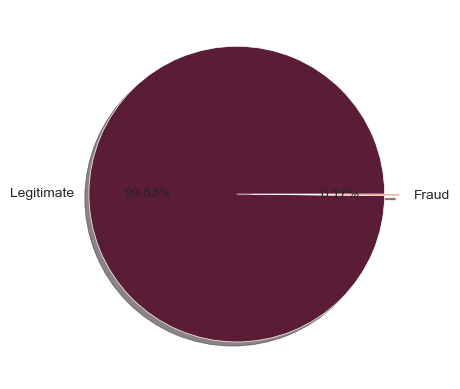

In [707]:
plt.pie(credit_data['Class'].value_counts(),labels=['Legitimate','Fraud'],autopct='%1.2f%%',colors=["#5a1d35","#f41b03"],explode=[0.1,0],shadow=True)

<h4 style="color:#00ff77ff">16. Splitting the dataset into two subsets based on the <code style="color:#ffd166; font-weight:600;">Class</code> label —> <code style="color:#ffd166; font-weight:600;">legit</code> for legitimate transactions (<code style="color:#ffd166; font-weight:600;">Class = 0</code>) and <code style="color:#ffd166; font-weight:600;">fraud</code> for fraudulent ones (<code style="color:#ffd166; font-weight:600;">Class = 1</code>). The <code style="color:#ffd166; font-weight:600;">print()</code> statements display their respective shapes, allowing quick verification of the number of samples in each category and confirming the presence of significant class imbalance, a common challenge in fraud detection datasets.</h4>


In [708]:
legit=credit_data[credit_data['Class']==0]
fraud=credit_data[credit_data['Class']==1]
print(f"Number of legitimate transactions: {legit.shape}")
print(f"Number of fraudulent transactions: {fraud.shape}")

Number of legitimate transactions: (283253, 31)
Number of fraudulent transactions: (473, 31)


<h4 style="color:#00ff77ff">17. Generating descriptive statistics for the <code style="color:#ffd166; font-weight:600;">Amount</code> feature within legitimate transactions using <code style="color:#ffd166; font-weight:600;">legit.Amount.describe()</code> —> providing key insights such as count, mean, standard deviation, minimum, quartiles, and maximum values, which help in understanding the typical spending patterns of non-fraudulent transactions and serve as a baseline for comparison against fraudulent transaction behavior.</h4>


In [709]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

<h4 style="color:#00ff77ff">18. Summarizing the statistical characteristics of the <code style="color:#ffd166; font-weight:600;">Amount</code> feature for fraudulent transactions using <code style="color:#ffd166; font-weight:600;">fraud.Amount.describe()</code> —> displaying essential measures such as count, mean, standard deviation, minimum, quartiles, and maximum values to analyze spending trends in fraudulent activity and compare them with legitimate transactions, aiding in the identification of unusual spending behaviors indicative of fraud.</h4>


In [710]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<h4 style="color:#00ff77ff">18. Summarizing the statistical characteristics of the <code style="color:#ffd166; font-weight:600;">Amount</code> feature for fraudulent transactions using <code style="color:#ffd166; font-weight:600;">fraud.Amount.describe()</code> —> displaying essential measures such as count, mean, standard deviation, minimum, quartiles, and maximum values to analyze spending trends in fraudulent activity and compare them with legitimate transactions, aiding in the identification of unusual spending behaviors indicative of fraud.</h4>


In [711]:
legit=legit.sample(473)

<h4 style="color:#00ff77ff">20. Verifying dataset balance and combining subsets using <code style="color:#ffd166; font-weight:600;">print(legit.shape)</code> and <code style="color:#ffd166; font-weight:600;">print(fraud.shape)</code> to confirm equal sample sizes, then merging them with <code style="color:#ffd166; font-weight:600;">pd.concat([legit, fraud], axis=0)</code> into a new balanced DataFrame named <code style="color:#ffd166; font-weight:600;">creditData</code>. Finally, <code style="color:#ffd166; font-weight:600;">print(creditData.shape)</code> displays the overall shape of the combined dataset —> ensuring both classes are represented equally for unbiased model training and evaluation.</h4>


In [712]:
print(legit.shape)
print(fraud.shape)
creditData=pd.concat([legit,fraud],axis=0)
print(creditData.shape)

(473, 31)
(473, 31)
(946, 31)


<h4 style="color:#00ff77ff">21. Confirming class balance and visualizing class distribution using <code style="color:#ffd166; font-weight:600;">creditData['Class'].value_counts()</code> to verify equal representation of legitimate and fraudulent transactions, followed by a bar plot created with <code style="color:#ffd166; font-weight:600;">.plot(kind='bar')</code>. The plot applies custom colors (<code style="color:#ffd166; font-weight:600;">["#051446","#0127A4"]</code>), title <code style="color:#ffd166; font-weight:600;">'Class Distribution'</code>, axis labels, and gridlines —> providing a clear visual confirmation that the dataset is balanced, ensuring fair training and evaluation of the fraud detection model.</h4>


<Axes: title={'center': 'Class Distribution'}, xlabel='Class', ylabel='Frequency'>

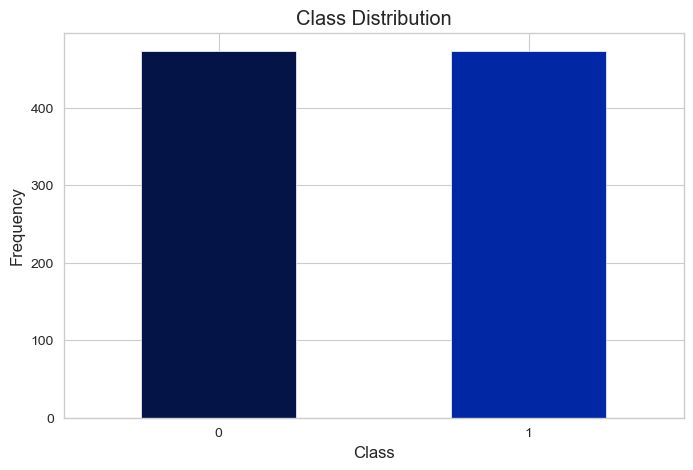

In [713]:
creditData['Class'].value_counts()
creditData['Class'].value_counts().plot(kind='bar',color=["#051446","#0127A4"],title='Class Distribution',rot=0,figsize=(8,5),xlabel='Class',ylabel='Frequency',grid=True,legend=False)

<h4 style="color:#00ff77ff">22. Creating a correlation heatmap to analyze feature relationships using <code style="color:#ffd166; font-weight:600;">sns.heatmap()</code> on <code style="color:#ffd166; font-weight:600;">creditData.corr()</code> within a figure sized <code style="color:#ffd166; font-weight:600;">(12,15)</code>. The heatmap includes annotated correlation coefficients (<code style="color:#ffd166; font-weight:600;">annot=True</code>) with a <code style="color:#ffd166; font-weight:600;">'coolwarm'</code> color palette, formatted to two decimals (<code style="color:#ffd166; font-weight:600;">fmt='.2f'</code>), and styled with gridlines (<code style="color:#ffd166; font-weight:600;">linewidths=0.5</code>) and square cells (<code style="color:#ffd166; font-weight:600;">square=True</code>). This visualization highlights linear relationships between features and the target variable, helping identify multicollinearity and key predictors for the fraud detection model.</h4>


<Axes: >

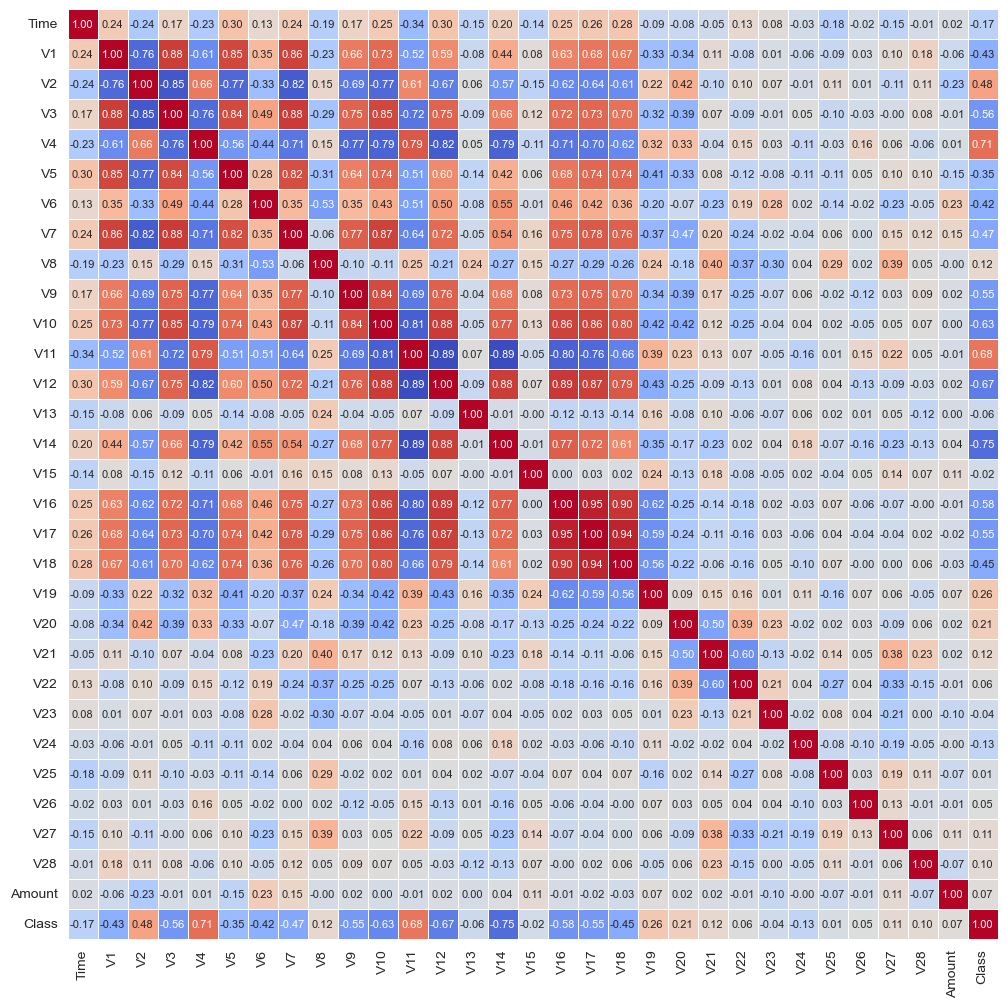

In [714]:
plt.figure(figsize=(12,15))
sns.heatmap(creditData.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,cbar=False,square=True,annot_kws={"size":8})

<h4 style="color:#00ff77ff">23. Visualizing the distribution of transaction amounts using <code style="color:#ffd166; font-weight:600;">sns.kdeplot()</code> with shading enabled (<code style="color:#ffd166; font-weight:600;">shade=True</code>) and color set to red (<code style="color:#ffd166; font-weight:600;">color='r'</code>). The plot is titled <code style="color:#ffd166; font-weight:600;">'Distribution of Transaction Amount'</code> with labeled axes for <code style="color:#ffd166; font-weight:600;">Amount</code> and <code style="color:#ffd166; font-weight:600;">Density</code>. This Kernel Density Estimation (KDE) plot provides a smooth visualization of how transaction values are distributed across the dataset, helping identify skewness, concentration areas, and potential anomalies in transaction behavior.</h4>


C:\Users\Rammah\AppData\Local\Temp\ipykernel_14252\3190126613.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditData['Amount'],shade=True,color='r')


Text(0, 0.5, 'Density')

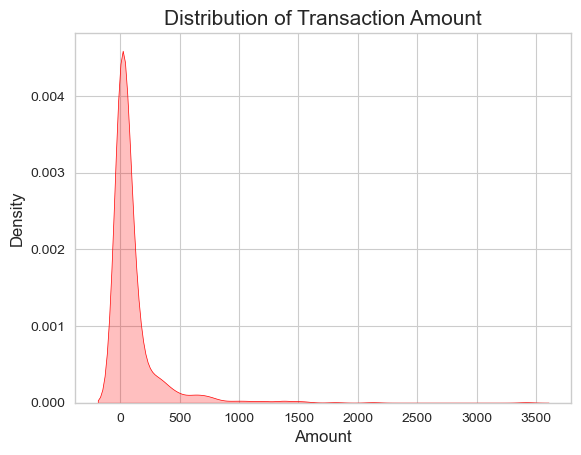

In [715]:
sns.kdeplot(creditData['Amount'],shade=True,color='r')
plt.title('Distribution of Transaction Amount',fontsize=15)
plt.xlabel('Amount',fontsize=12)
plt.ylabel('Density',fontsize=12)   

<h4 style="color:#00ff77ff">24. Plotting the distribution of transaction times using <code style="color:#ffd166; font-weight:600;">sns.kdeplot()</code> with shading enabled (<code style="color:#ffd166; font-weight:600;">shade=True</code>) and a red color theme (<code style="color:#ffd166; font-weight:600;">color='r'</code>). This Kernel Density Estimation (KDE) curve illustrates how transactions are distributed over time, revealing activity patterns, peaks, and potential temporal anomalies that may assist in detecting fraudulent behavior or understanding transaction trends throughout the day.</h4>

C:\Users\Rammah\AppData\Local\Temp\ipykernel_14252\3447861214.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditData['Time'],shade=True,color='r')


<Axes: xlabel='Time', ylabel='Density'>

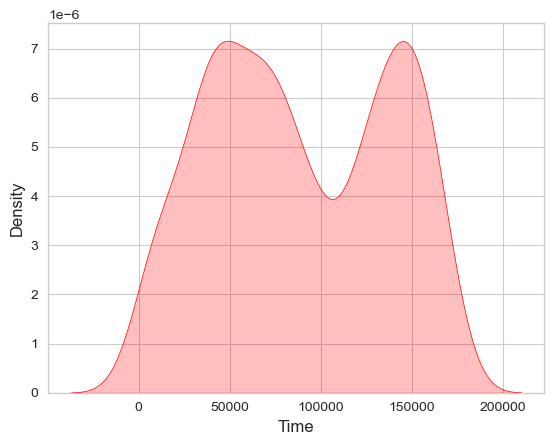

In [716]:
sns.kdeplot(creditData['Time'],shade=True,color='r')

<h4 style="color:#00ff77ff">25. Splitting features and target variables for model training — creating <code style="color:#ffd166; font-weight:600;">X</code> by dropping the target column <code style="color:#ffd166; font-weight:600;">'Class'</code> and assigning it separately to <code style="color:#ffd166; font-weight:600;">y</code>. The dataset is then divided into training and testing subsets using <code style="color:#ffd166; font-weight:600;">train_test_split()</code> with <code style="color:#ffd166; font-weight:600;">test_size=0.3</code> (30% for testing) and a fixed <code style="color:#ffd166; font-weight:600;">random_state=42</code> to ensure reproducibility. This step prepares the data for model development, enabling fair evaluation of the classifier’s performance on unseen data.</h4>

In [717]:
X=creditData.drop('Class',axis=1)
y=creditData['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<h4 style="color:#00ff77ff">26. Initializing and training the Logistic Regression model using <code style="color:#ffd166; font-weight:600;">LogisticRegression(random_state=42)</code> to ensure consistent results across runs, followed by fitting the model with <code style="color:#ffd166; font-weight:600;">model.fit(X_train, y_train)</code>. This process allows the classifier to learn relationships between input features and the target variable, effectively modeling the probability of a transaction being legitimate or fraudulent based on the training data.</h4>

In [718]:
model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

<h4 style="color:#00ff77ff">27. Evaluating model performance by calculating the accuracy score using <code style="color:#ffd166; font-weight:600;">accuracy_score(y_test, model.predict(X_test))</code> and storing it in <code style="color:#ffd166; font-weight:600;">accuracyScore</code>. This metric measures the proportion of correctly predicted transactions (both legitimate and fraudulent) out of all test samples —> providing a quick overview of how well the Logistic Regression model generalizes to unseen data.</h4>

In [719]:
accuracyScore=accuracy_score(y_test,model.predict(X_test))
accuracyScore

0.9507042253521126

<h4 style="color:#00ff77ff">28. Generating and visualizing the confusion matrix using <code style="color:#ffd166; font-weight:600;">confusion_matrix(y_test, model.predict(X_test))</code> to evaluate model classification results, and plotting it with <code style="color:#ffd166; font-weight:600;">sns.heatmap()</code> using the <code style="color:#ffd166; font-weight:600;">'Blues'</code> color palette and annotated integer values (<code style="color:#ffd166; font-weight:600;">fmt='d'</code>). The heatmap clearly displays True Positives, True Negatives, False Positives, and False Negatives —> allowing a deeper understanding of model accuracy, precision, and recall performance for legitimate versus fraudulent transactions.</h4>


<Axes: >

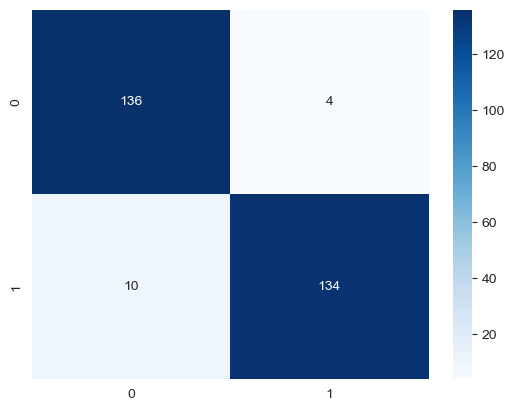

In [720]:
confusionMatrix=confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(confusionMatrix,annot=True,cmap='Blues',fmt='d')

<h4 style="color:#00ff77ff">29. Generating a detailed performance summary using <code style="color:#ffd166; font-weight:600;">classification_report(y_test, model.predict(X_test))</code> and printing it as <code style="color:#ffd166; font-weight:600;">classificationReport</code>. This report provides key evaluation metrics — <code style="color:#ffd166; font-weight:600;">precision</code>, <code style="color:#ffd166; font-weight:600;">recall</code>, <code style="color:#ffd166; font-weight:600;">F1-score</code>, and <code style="color:#ffd166; font-weight:600;">support</code> —> for each class (legitimate and fraudulent), offering a comprehensive understanding of the model’s strengths and weaknesses in correctly identifying fraud cases while minimizing false positives and negatives.</h4>


In [721]:
classificationReport=classification_report(y_test,model.predict(X_test))
print(classificationReport)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       140
           1       0.97      0.93      0.95       144

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284

